In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
raw_csv_data=pd.read_csv("Index2018.csv")

In [3]:
df_comp=raw_csv_data.copy()
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [4]:
df_comp.date=pd.to_datetime(df_comp.date,dayfirst=True)
df_comp.set_index("date",inplace=True)
df_comp=df_comp.asfreq("b")
df_comp=df_comp.fillna(method="ffill") #fill the null values forward fill technique

size=int(len(df_comp)*0.8)  #whatever dataset given we will take 1st 80% of that as training data
df,df_test=df_comp.iloc[:size],df_comp.iloc[size:]
df["market_value"]=df_comp.ftse #we will take only ftse column and put it as market value
#df.market_value.pct_change(1)
del df_comp["spx"]
del df_comp["dax"]
del df_comp["ftse"]
del df_comp["nikkei"]

df["returns"]=df.market_value.pct_change(1).mul(100) #pct change(1)show period that is 1 day in our case
df=df.iloc[1:]

In [5]:
df.head()

,spx,dax,ftse,nikkei,market_value,returns
date,,,,,,
1994-01-10,475.27,2225.00,3440.58,18443.44,3440.58,-0.156704
1994-01-11,474.13,2228.10,3413.77,18485.25,3413.77,-0.779229
1994-01-12,474.17,2182.06,3372.02,18793.88,3372.02,-1.222988
1994-01-13,472.47,2142.37,3360.01,18577.26,3360.01,-0.356166
1994-01-14,474.91,2151.05,3400.56,18973.70,3400.56,1.206842


In [6]:
df["returns"].head() #here negative values shows loss and positive shows gain

date
1994-01-10   -0.156704
1994-01-11   -0.779229
1994-01-12   -1.222988
1994-01-13   -0.356166
1994-01-14    1.206842
Freq: B, Name: returns, dtype: float64

# The DF_Test

In [7]:
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts

In [8]:
sts.adfuller(df.returns) #here p value is 7.798e-24 equal to zero than data is stationary

(-12.770265719497258,
 7.798058336037547e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 15696.767245697501)

# LLR

In [9]:
def LLR_test(mod_1,mod_2,DF=1):
    L1=mod_1.fit().llf
    L2=mod_2.fit().llf
    LR=(2*(L2-L1))
    p=chi2.sf(LR,DF).round(3)
    return p

# this is the model to compare 2 model 1 and 2  from model 2 to 1 is there any significance improvement or not idf there is improvement we reject  null hypothysis

In [10]:
import statsmodels.graphics.tsaplots as sgt

# ACF and PACF for Returns

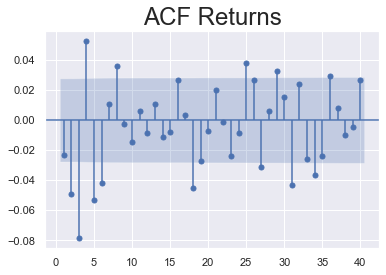

In [12]:
sgt.plot_acf(df.returns,lags=40,zero=False)
plt.title("ACF Returns",size=24)
plt.show()

#here dark  region is +2se and -2se we will consider only those lags which is out  of this dark region

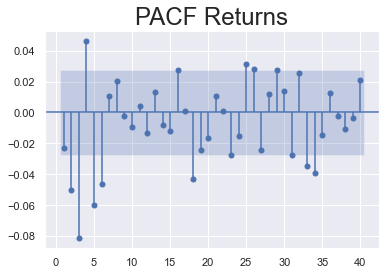

In [13]:
sgt.plot_pacf(df.returns,lags=40,zero=False,method=("ols"))
plt.title("PACF Returns",size=24)
plt.show()

# 6 is regionable here best model is AR(5) or AR(6)

In [14]:
from statsmodels.tsa.arima_model import ARMA

# MA(1) for Returns

In [15]:
model_MA1=ARMA(df.returns,order=(0,1)) #here AR is zero so we are building MA(1) model

In [16]:
results_MA1=model_MA1.fit()

In [17]:
results_MA1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 1)   Log Likelihood               -7929.595
Method:                       css-mle   S.D. of innovations              1.174
Date:                Wed, 06 Sep 2023   AIC                          15865.190
Time:                        15:00:30   BIC                          15884.754
Sample:                    01-10-1994   HQIC                         15872.045
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.162      0.245      -0.013       0.050
ma.L1.returns    -0.0257      0.015     -1.720      0.085      -0.055       0.004
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           38.8549           +0.0000j           38.8549            0.0000
-----------------------------------------------------------------------------
"""

In [18]:
model_MA2=ARMA(df.returns,order=(0,2))
results_MA2=model_MA2.fit()
results_MA2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 2)   Log Likelihood               -7922.864
Method:                       css-mle   S.D. of innovations              1.173
Date:                Wed, 06 Sep 2023   AIC                          15853.728
Time:                        15:01:09   BIC                          15879.812
Sample:                    01-10-1994   HQIC                         15862.868
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.239      0.215      -0.011       0.049
ma.L1.returns    -0.0327      0.014     -2.297      0.022      -0.061      -0.005
ma.L2.returns    -0.0502      0.014     -3.669      0.000      -0.077      -0.023
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            4.1499           +0.0000j            4.1499            0.0000
MA.2           -4.8004           +0.0000j            4.8004            0.5000
-----------------------------------------------------------------------------
"""

In [19]:
LLR_test(model_MA1,model_MA2)

0.0

In [23]:
model_MA3=ARMA(df.returns,order=(0,3))
results_MA3=model_MA3.fit()
results_MA3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 3)   Log Likelihood               -7904.317
Method:                       css-mle   S.D. of innovations              1.168
Date:                Wed, 06 Sep 2023   AIC                          15818.634
Time:                        15:02:50   BIC                          15851.240
Sample:                    01-10-1994   HQIC                         15830.060
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.376      0.169      -0.008       0.046
ma.L1.returns    -0.0203      0.014     -1.423      0.155      -0.048       0.008
ma.L2.returns    -0.0556      0.013     -4.134      0.000      -0.082      -0.029
ma.L3.returns    -0.0904      0.015     -6.121      0.000      -0.119      -0.061
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            2.0105           -0.0000j            2.0105           -0.0000
MA.2           -1.3129           -1.9441j            2.3459           -0.3445
MA.3           -1.3129           +1.9441j            2.3459            0.3445
-----------------------------------------------------------------------------
"""

In [24]:
LLR_test(model_MA2,model_MA3)

0.0

In [25]:
model_MA4=ARMA(df.returns,order=(0,4))
results_MA4=model_MA4.fit()
results_MA4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 4)   Log Likelihood               -7898.773
Method:                       css-mle   S.D. of innovations              1.167
Date:                Wed, 06 Sep 2023   AIC                          15809.547
Time:                        15:02:52   BIC                          15848.674
Sample:                    01-10-1994   HQIC                         15823.257
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.305      0.192      -0.009       0.047
ma.L1.returns    -0.0203      0.014     -1.443      0.149      -0.048       0.007
ma.L2.returns    -0.0551      0.014     -3.902      0.000      -0.083      -0.027
ma.L3.returns    -0.0922      0.015     -6.306      0.000      -0.121      -0.064
ma.L4.returns     0.0454      0.014      3.338      0.001       0.019       0.072
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.2257           -1.4206j            1.8763           -0.3633
MA.2           -1.2257           +1.4206j            1.8763            0.3633
MA.3            2.2405           -1.1103j            2.5006           -0.0732
MA.4            2.2405           +1.1103j            2.5006            0.0732
-----------------------------------------------------------------------------
"""

In [26]:
LLR_test(model_MA3,model_MA4)

0.001

In [27]:
model_MA5=ARMA(df.returns,order=(0,5))
results_MA5=model_MA5.fit()
results_MA5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 5)   Log Likelihood               -7892.823
Method:                       css-mle   S.D. of innovations              1.166
Date:                Wed, 06 Sep 2023   AIC                          15799.645
Time:                        15:03:35   BIC                          15845.294
Sample:                    01-10-1994   HQIC                         15815.641
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.376      0.169      -0.008       0.046
ma.L1.returns    -0.0262      0.014     -1.851      0.064      -0.054       0.002
ma.L2.returns    -0.0497      0.014     -3.518      0.000      -0.077      -0.022
ma.L3.returns    -0.0852      0.015     -5.799      0.000      -0.114      -0.056
ma.L4.returns     0.0458      0.014      3.374      0.001       0.019       0.072
ma.L5.returns    -0.0500      0.014     -3.454      0.001      -0.078      -0.022
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.2127           -1.0805j            1.6242           -0.3842
MA.2           -1.2127           +1.0805j            1.6242            0.3842
MA.3            1.7305           -0.0000j            1.7305           -0.0000
MA.4            0.8062           -1.9326j            2.0940           -0.1871
MA.5            0.8062           +1.9326j            2.0940            0.1871
-----------------------------------------------------------------------------
"""

In [28]:
LLR_test(model_MA4,model_MA5)

0.001

In [29]:
model_MA6=ARMA(df.returns,order=(0,6))
results_MA6=model_MA6.fit()
results_MA6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 6)   Log Likelihood               -7889.221
Method:                       css-mle   S.D. of innovations              1.165
Date:                Wed, 06 Sep 2023   AIC                          15794.442
Time:                        15:04:30   BIC                          15846.612
Sample:                    01-10-1994   HQIC                         15812.723
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.430      0.153      -0.007       0.045
ma.L1.returns    -0.0237      0.014     -1.682      0.093      -0.051       0.004
ma.L2.returns    -0.0486      0.014     -3.436      0.001      -0.076      -0.021
ma.L3.returns    -0.0827      0.014     -5.846      0.000      -0.110      -0.055
ma.L4.returns     0.0466      0.014      3.434      0.001       0.020       0.073
ma.L5.returns    -0.0484      0.014     -3.371      0.001      -0.077      -0.020
ma.L6.returns    -0.0387      0.014     -2.682      0.007      -0.067      -0.010
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.5011           -0.0000j            1.5011           -0.0000
MA.2            0.8248           -1.4775j            1.6921           -0.1690
MA.3            0.8248           +1.4775j            1.6921            0.1690
MA.4           -1.0066           -1.2260j            1.5863           -0.3594
MA.5           -1.0066           +1.2260j            1.5863            0.3594
MA.6           -2.3891           -0.0000j            2.3891           -0.5000
-----------------------------------------------------------------------------
"""

In [30]:
LLR_test(model_MA5,model_MA6)

0.007